<font size="5">IMPORTING DEPENDENCIES</font>

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

<font size="5">LOADING DATASET</font>

In [83]:
df = pd.read_csv("mcdonalds.csv")
df.shape
df.head()
df.dtypes

# checking for null data --> No null data
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

<font size="5">FREQUENCY OF THE VARIABLES</font>

In [84]:
df['Gender'].value_counts()
df['VisitFrequency'].value_counts()
df['Like'].value_counts()



+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

<font size="5">COUNT OF GENDER</font>

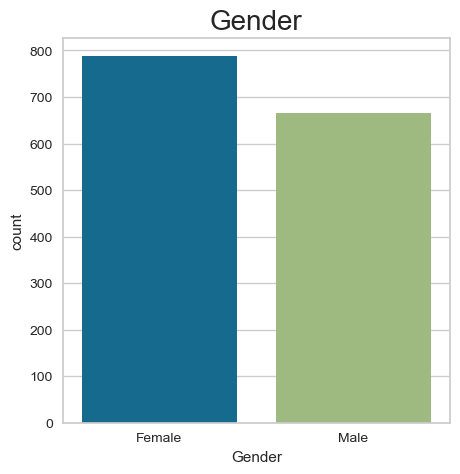

In [85]:
plt.rcParams['figure.figsize'] = (5, 5)
sns.countplot(x=df["Gender"])
plt.title('Gender', fontsize = 20)
plt.show()

<font size="5">AGE DISTRIBUTION</font>

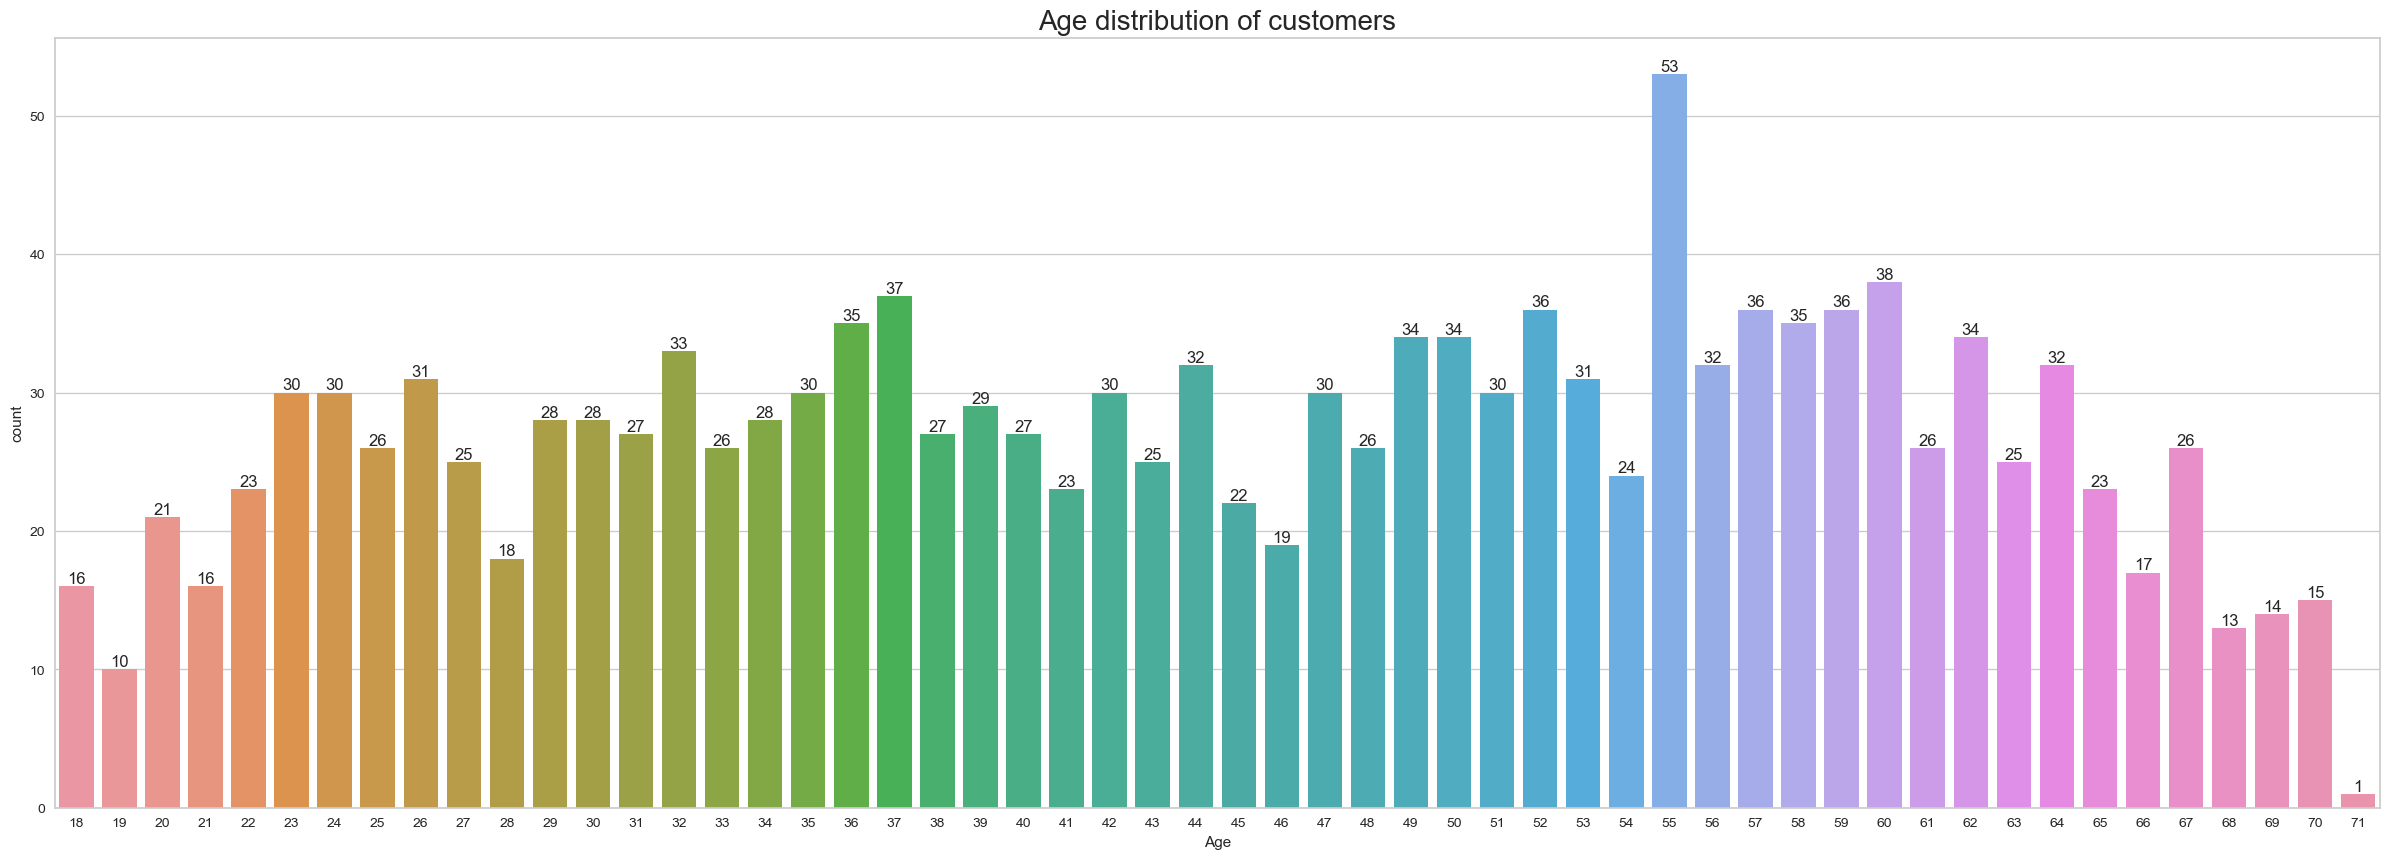

In [86]:
plt.rcParams['figure.figsize'] = (30, 10)
Age = sns.countplot(x=df['Age'])
Age.bar_label(Age.containers[0])
plt.title('Age distribution of customers', fontsize = 20)
plt.show()

<font size="5">CSV ERROR RECTIFYING</font>

In [87]:
#easier understanding
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

<font size="5">LABEL ENCODING USING SKLEARN</font>

In [88]:
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


<font size="5">CREATING NEW DATAFRAME FOR 11 CATEGORICAL VARIABLES</font>

In [89]:
#Considering only the 11 categorcial columns

df_eleven = df.loc[:,cat]
df_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


<font size="5">CONVERTING THE NEWLY CREATED DATAFRAME TO ARRAY</font>

In [90]:
x = df.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

<font size="5">PRINCIPAL COMPONENT ANALYSIS</font>

In [91]:
#Principal component analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
pca_data = preprocessing.scale(x)

pca = PCA(n_components=2)
pc = pca.fit_transform(x)
names = ['pc1','pc2']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2
0,0.425367,-0.219079
1,-0.218638,0.388190
2,0.375415,0.730435
3,-0.172926,-0.352752
4,0.187057,-0.807610
...,...,...
1448,1.550242,0.275031
1449,-0.957339,0.014308
1450,-0.185894,1.062662
1451,-1.182064,-0.038570


<font size="5">PRINCIPAL COMPONENT SCORE</font>

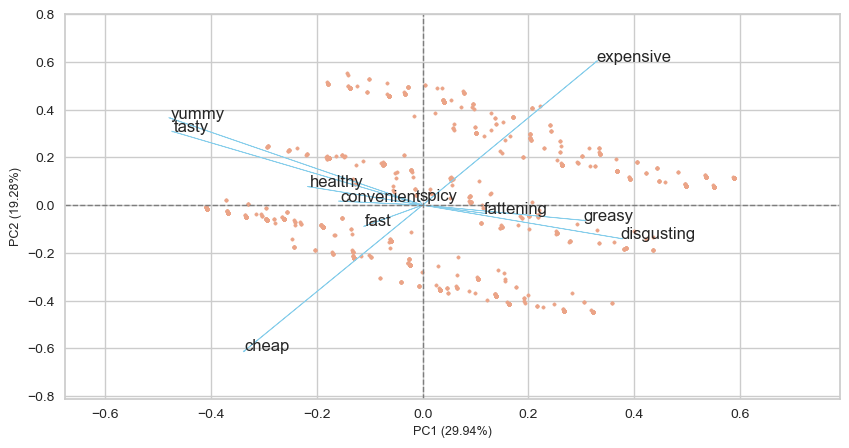

In [92]:
loadings = pca.components_
num_pc = pca.n_features_

pca_scores = PCA().fit_transform(x)

cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

<font size="5">K-MEANS CLUSTERING</font>

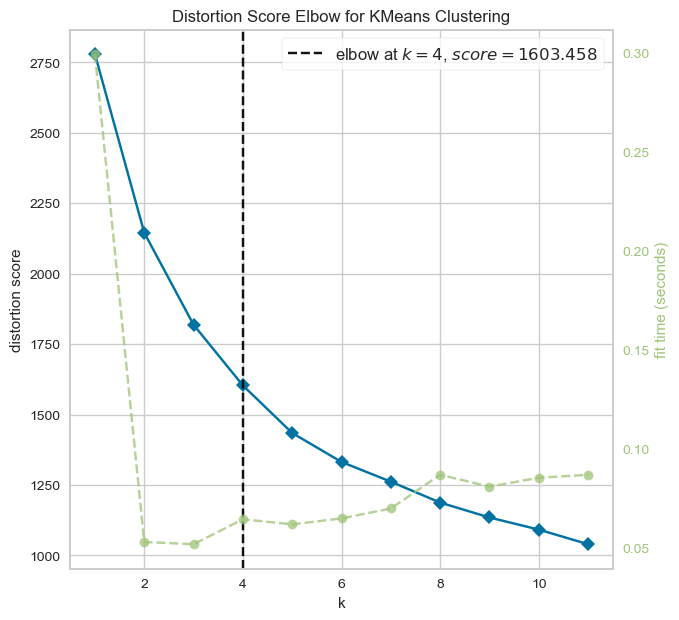

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [93]:
plt.rcParams['figure.figsize'] = (7, 7)
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_eleven)
visualizer.show()

In [94]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df['cluster_num'] = kmeans.labels_ 
print (kmeans.labels_) 
print (kmeans.inertia_) 
print(kmeans.n_iter_) 
print(kmeans.cluster_centers_) 

[2 0 0 ... 0 1 3]
1603.0604440558927
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


<font size="5">CLUSTER SIZE</font>

In [95]:
Counter(kmeans.labels_)

Counter({2: 304, 0: 323, 1: 580, 3: 246})

<font size="5">K-MEANS PLOTTING</font>

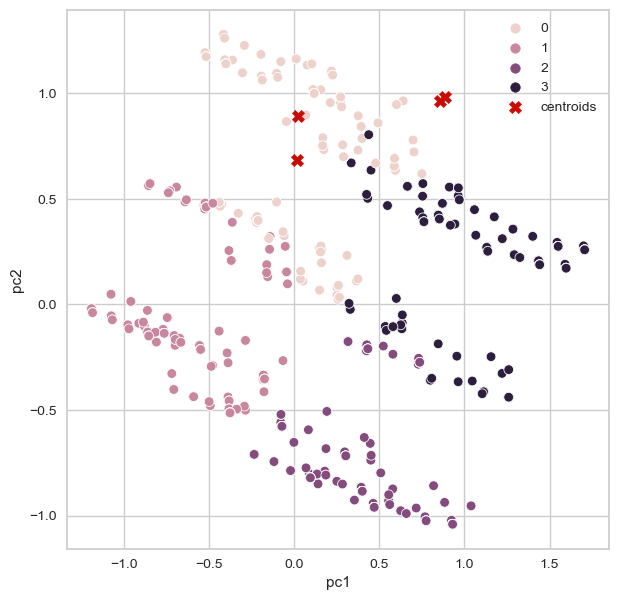

In [96]:
plt.rcParams['figure.figsize'] = (7, 7)
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

<font size="5">CLUSTER FOR EVERY RATING</font>

In [97]:
crosstab =pd.crosstab(df['cluster_num'],df['Like'])

crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab 

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


<font size="5">GENDER AND CLUSTER MOSAIC PLOT</font>

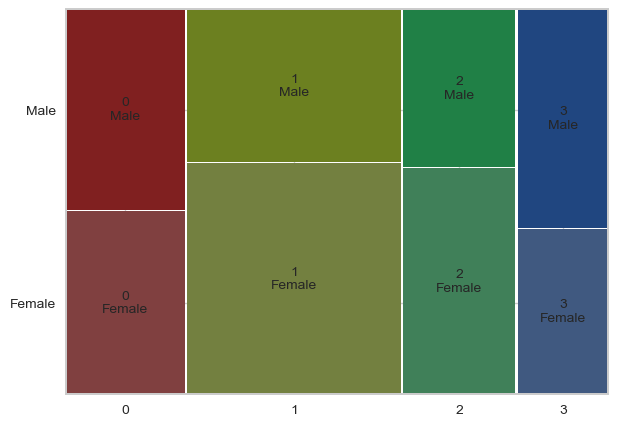

In [98]:
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<font size="5">BOXPLOT AGE</font>

<AxesSubplot:xlabel='cluster_num', ylabel='Age'>

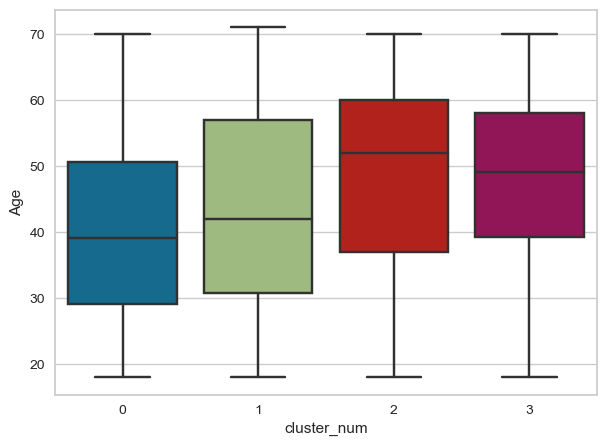

In [99]:
sns.boxplot(x="cluster_num", y="Age", data=df)

<font size="5">GROUPING VISIT FREQUENCY</font>

In [100]:
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


<font size="5">GROUPING BY LIKE </font>

In [101]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.275542
1,1,2.962069
2,2,6.171053
3,3,7.422764


<font size="5">GROUPING BY GENDER</font>

In [102]:
#Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


<font size="5">FINAL SEGMENTATION </font>

In [103]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.275542,2.547988
1,1,0.398276,2.962069,2.584483
2,2,0.411184,6.171053,2.822368
3,3,0.569106,7.422764,2.654472


<font size="5">SEGEMENTATION EVALUATION</font>

Text(0, 0.5, 'Like')

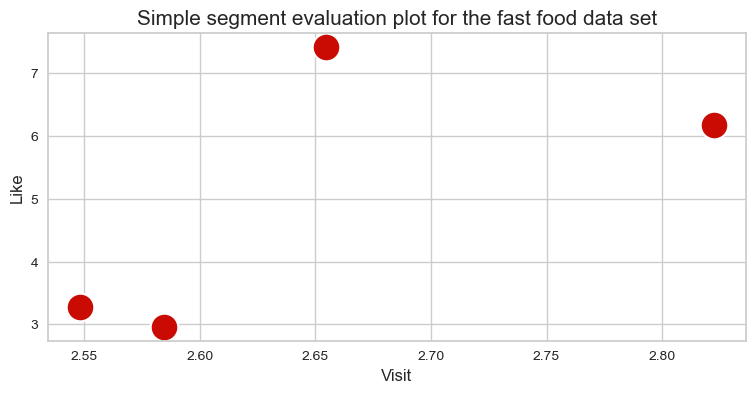

In [104]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 